<a href="https://colab.research.google.com/github/lakshithagnk/CNN-image-classification/blob/main/Assignment_03_MINIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 CNN for image classification

1. Set up your environment: Ensure that you have installed all the required software packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import Adam

2. Prepare your dataset: Choose a data set from UCI Machine Learning Repository that is appropriate for classification. Download the selected dataset.

3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize and reshape
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)

# Split the dataset
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Testing set shape:", test_images.shape, test_labels.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training set shape: (42000, 28, 28, 1) (42000,)
Validation set shape: (14000, 28, 28, 1) (14000,)
Testing set shape: (14000, 28, 28, 1) (14000,)


4. Build the CNN model: A common CNN design consists of interleaving convolutional and max-pooling layers, ending with a linear classification layer

In [14]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3),
                  activation=tf.keras.layers.LeakyReLU(alpha=0.01),
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 64)               

7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate.

In [15]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

Epoch 1/20
42/42 [==============================] - 36s 830ms/step - loss: 1.6228 - accuracy: 0.4878 - val_loss: 0.6096 - val_accuracy: 0.8216
Epoch 2/20
42/42 [==============================] - 33s 786ms/step - loss: 0.5596 - accuracy: 0.8227 - val_loss: 0.2632 - val_accuracy: 0.9259
Epoch 3/20
42/42 [==============================] - 32s 773ms/step - loss: 0.3045 - accuracy: 0.9094 - val_loss: 0.1694 - val_accuracy: 0.9496
Epoch 4/20
42/42 [==============================] - 32s 768ms/step - loss: 0.2189 - accuracy: 0.9362 - val_loss: 0.1373 - val_accuracy: 0.9584
Epoch 5/20
42/42 [==============================] - 33s 790ms/step - loss: 0.1844 - accuracy: 0.9459 - val_loss: 0.1076 - val_accuracy: 0.9686
Epoch 6/20
42/42 [==============================] - 32s 771ms/step - loss: 0.1500 - accuracy: 0.9553 - val_loss: 0.0974 - val_accuracy: 0.9691
Epoch 7/20
42/42 [==============================] - 32s 768ms/step - loss: 0.1334 - accuracy: 0.9605 - val_loss: 0.0812 - val_accuracy: 0.9756

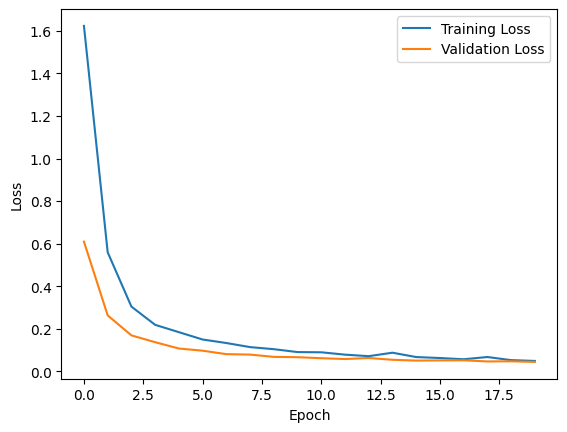

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.

438/438 [==============================] - 3s 6ms/step - loss: 0.0548 - accuracy: 0.9840
Test accuracy: 0.984000027179718
438/438 [==============================] - 3s 6ms/step


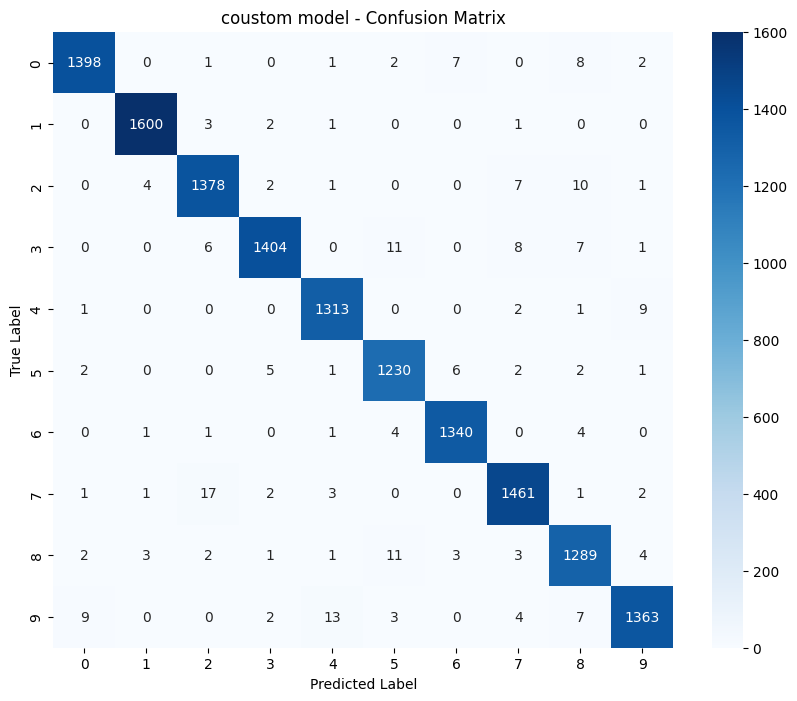

In [18]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Prediction
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("coustom model - Confusion Matrix")
plt.show()


In [ ]:
# precision and recall
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1419
           1       0.99      0.99      0.99      1607
           2       0.98      0.98      0.98      1403
           3       0.98      0.98      0.98      1437
           4       0.99      0.98      0.99      1326
           5       0.99      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.99      0.98      0.98      1488
           8       0.97      0.98      0.98      1319
           9       0.99      0.97      0.98      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
# precision and recall
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.9848
Recall: 0.9848


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. Comment on your results and select a learning
rate with a justification.

**learning_rate = 0.0001**

Epoch 1/20
42/42 [==============================] - 35s 807ms/step - loss: 2.2079 - accuracy: 0.3002 - val_loss: 2.0497 - val_accuracy: 0.5501
Epoch 2/20
42/42 [==============================] - 32s 763ms/step - loss: 1.8278 - accuracy: 0.4767 - val_loss: 1.4274 - val_accuracy: 0.7046
Epoch 3/20
42/42 [==============================] - 33s 778ms/step - loss: 1.2802 - accuracy: 0.6144 - val_loss: 0.8789 - val_accuracy: 0.8034
Epoch 4/20
42/42 [==============================] - 32s 773ms/step - loss: 0.9012 - accuracy: 0.7172 - val_loss: 0.5853 - val_accuracy: 0.8619
Epoch 5/20
42/42 [==============================] - 32s 764ms/step - loss: 0.6765 - accuracy: 0.7900 - val_loss: 0.4338 - val_accuracy: 0.8953
Epoch 6/20
42/42 [==============================] - 32s 773ms/step - loss: 0.5384 - accuracy: 0.8399 - val_loss: 0.3416 - val_accuracy: 0.9118
Epoch 7/20
42/42 [==============================] - 32s 776ms/step - loss: 0.4460 - accuracy: 0.8677 - val_loss: 0.2849 - val_accuracy: 0.9227

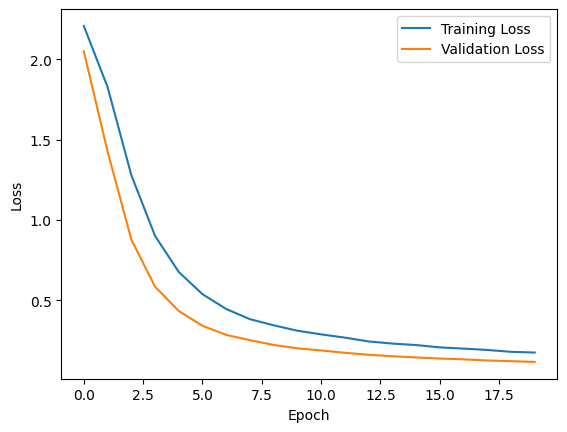

In [ ]:
model1 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.001**

Epoch 1/20
42/42 [==============================] - 35s 812ms/step - loss: 1.2072 - accuracy: 0.6160 - val_loss: 0.3149 - val_accuracy: 0.9024
Epoch 2/20
42/42 [==============================] - 33s 778ms/step - loss: 0.3039 - accuracy: 0.9083 - val_loss: 0.1447 - val_accuracy: 0.9569
Epoch 3/20
42/42 [==============================] - 33s 776ms/step - loss: 0.1713 - accuracy: 0.9495 - val_loss: 0.1300 - val_accuracy: 0.9602
Epoch 4/20
42/42 [==============================] - 33s 786ms/step - loss: 0.1529 - accuracy: 0.9554 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 5/20
42/42 [==============================] - 32s 766ms/step - loss: 0.1059 - accuracy: 0.9690 - val_loss: 0.0797 - val_accuracy: 0.9741
Epoch 6/20
42/42 [==============================] - 33s 783ms/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.0711 - val_accuracy: 0.9774
Epoch 7/20
42/42 [==============================] - 32s 775ms/step - loss: 0.0911 - accuracy: 0.9735 - val_loss: 0.0588 - val_accuracy: 0.9815

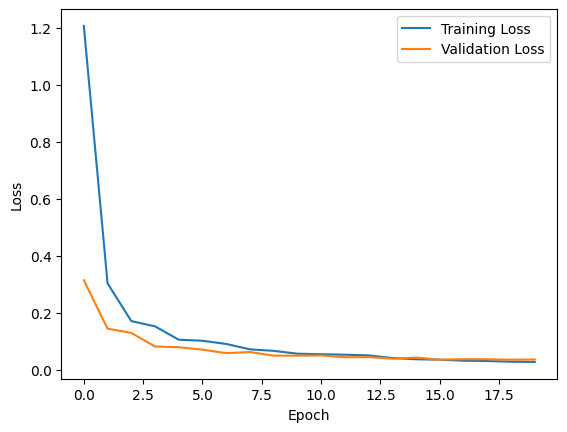

In [ ]:
model2 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.01**

Epoch 1/20
42/42 [==============================] - 34s 778ms/step - loss: 0.6073 - accuracy: 0.7959 - val_loss: 0.0886 - val_accuracy: 0.9721
Epoch 2/20
42/42 [==============================] - 32s 761ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 3/20
42/42 [==============================] - 32s 766ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0493 - val_accuracy: 0.9842
Epoch 4/20
42/42 [==============================] - 33s 783ms/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.0651 - val_accuracy: 0.9797
Epoch 5/20
42/42 [==============================] - 32s 773ms/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 6/20
42/42 [==============================] - 33s 783ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 7/20
42/42 [==============================] - 33s 788ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0831 - val_accuracy: 0.9821

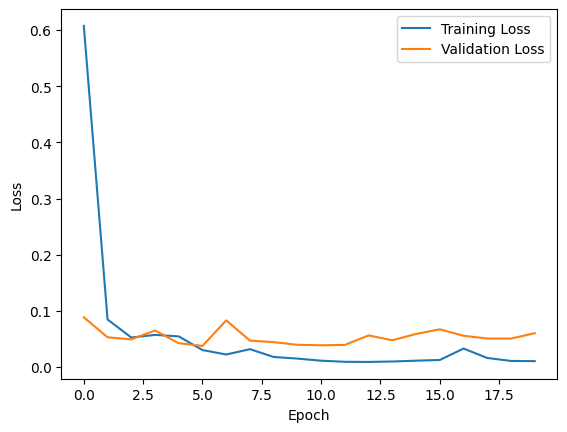

In [ ]:
model3 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.1**

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 909ms/step - accuracy: 0.0982 - loss: 50.5510 - val_accuracy: 0.1301 - val_loss: 94.5472
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 922ms/step - accuracy: 0.1060 - loss: 79.1608 - val_accuracy: 0.0944 - val_loss: 18.2473
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 875ms/step - accuracy: 0.1061 - loss: 2342.4351 - val_accuracy: 0.0971 - val_loss: 480.1347
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 964ms/step - accuracy: 0.1089 - loss: 1241.6759 - val_accuracy: 0.1571 - val_loss: 370.5522
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 871ms/step - accuracy: 0.1286 - loss: 571.0792 - val_accuracy: 0.3019 - val_loss: 103.2453
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 869ms/step - accuracy: 0.2103 - loss: 219.4522 - val_accuracy: 0.3371 - val_loss: 58.4132
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 868ms/step - accuracy: 0.1892 - loss: 1592.3445 - val_accuracy: 0.1138 - val_loss: 1031.6666
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 918ms/step - accuracy: 0.106

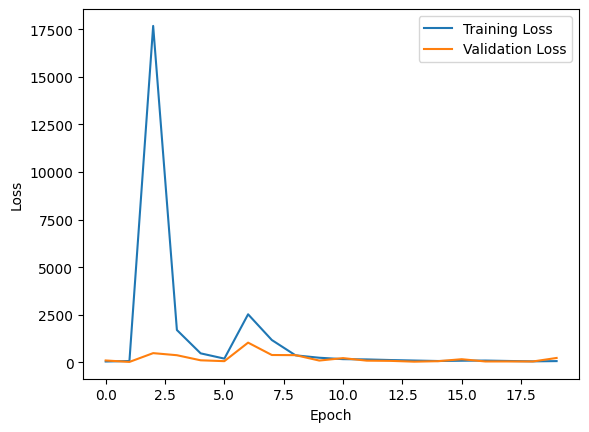

In [ ]:
model4 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3),
                  activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3),
                  activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64,
                 activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128,
                 activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.1
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model4.compile(optimizer=optimizer,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2 Compare your network with state-of-the-art networks

12. Choose two state-of-the-art pre-trained model
13. Load the pre-trained model and fine-tune it for the your dataset


In [3]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
train_images_resized = np.repeat(train_images, 3, axis=-1)
val_images_resized = np.repeat(val_images, 3, axis=-1)
test_images_resized = np.repeat(test_images, 3, axis=-1)

In [5]:
train_images_resized = tf.image.resize(train_images_resized, (32, 32))
val_images_resized = tf.image.resize(val_images_resized, (32, 32))
test_images_resized = tf.image.resize(test_images_resized, (32, 32))

14. Train the fine-tuned model using the same training and testing data split as your custom CNN model


In [6]:
# ResNet50
resnet_model.trainable = False
resnet_model = keras.Sequential([
    resnet_model,
    layers.Flatten(),
    layers.Dense(64,
                 tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128,
                 tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),
    layers.Dense(10,
                 activation='softmax')
])

resnet_model.compile(optimizer=Adam(learning_rate=0.0005),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_images_resized, train_labels,
                                  epochs=20, batch_size=1024,
                                  validation_data=(val_images_resized, val_labels))

Epoch 1/20
42/42 [==============================] - 240s 6s/step - loss: 2.0903 - accuracy: 0.2729 - val_loss: 1.6311 - val_accuracy: 0.5374
Epoch 2/20
42/42 [==============================] - 237s 6s/step - loss: 1.4903 - accuracy: 0.5010 - val_loss: 1.1293 - val_accuracy: 0.7296
Epoch 3/20
42/42 [==============================] - 231s 6s/step - loss: 1.1148 - accuracy: 0.6404 - val_loss: 0.8405 - val_accuracy: 0.7878
Epoch 4/20
42/42 [==============================] - 231s 6s/step - loss: 0.8842 - accuracy: 0.7235 - val_loss: 0.6856 - val_accuracy: 0.8064
Epoch 5/20
42/42 [==============================] - 230s 6s/step - loss: 0.7382 - accuracy: 0.7724 - val_loss: 0.5707 - val_accuracy: 0.8334
Epoch 6/20
42/42 [==============================] - 231s 6s/step - loss: 0.6429 - accuracy: 0.8018 - val_loss: 0.5060 - val_accuracy: 0.8494
Epoch 7/20
42/42 [==============================] - 230s 6s/step - loss: 0.5753 - accuracy: 0.8237 - val_loss: 0.4484 - val_accuracy: 0.8650
Epoch 8/20
42

In [7]:
# VGG16
vgg_model.trainable = False
vgg_model = keras.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(64,
                 tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128,
                 tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(32,
                 tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
    ])

vgg_model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

vgg_history = vgg_model.fit(train_images_resized, train_labels,
                            epochs=20, batch_size=1024,
                            validation_data=(val_images_resized, val_labels))

Epoch 1/20
42/42 [==============================] - 276s 7s/step - loss: 2.0292 - accuracy: 0.2849 - val_loss: 1.5751 - val_accuracy: 0.6054
Epoch 2/20
42/42 [==============================] - 271s 6s/step - loss: 1.4564 - accuracy: 0.5230 - val_loss: 0.9754 - val_accuracy: 0.7723
Epoch 3/20
42/42 [==============================] - 271s 6s/step - loss: 1.0508 - accuracy: 0.6663 - val_loss: 0.6271 - val_accuracy: 0.8439
Epoch 4/20
42/42 [==============================] - 271s 6s/step - loss: 0.8040 - accuracy: 0.7507 - val_loss: 0.4675 - val_accuracy: 0.8703
Epoch 5/20
42/42 [==============================] - 270s 6s/step - loss: 0.6765 - accuracy: 0.7908 - val_loss: 0.3670 - val_accuracy: 0.9025
Epoch 6/20
42/42 [==============================] - 271s 6s/step - loss: 0.5769 - accuracy: 0.8264 - val_loss: 0.3149 - val_accuracy: 0.9119
Epoch 7/20
42/42 [==============================] - 270s 6s/step - loss: 0.5119 - accuracy: 0.8436 - val_loss: 0.2647 - val_accuracy: 0.9259
Epoch 8/20
42

15. Record training and validation loss values for each epoch

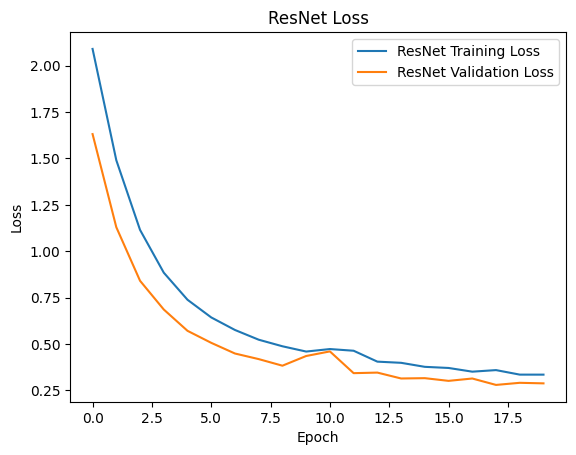

In [8]:
#ResNet
plt.plot(resnet_history.history['loss'], label='ResNet Training Loss')
plt.plot(resnet_history.history['val_loss'], label='ResNet Validation Loss')
plt.title('ResNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


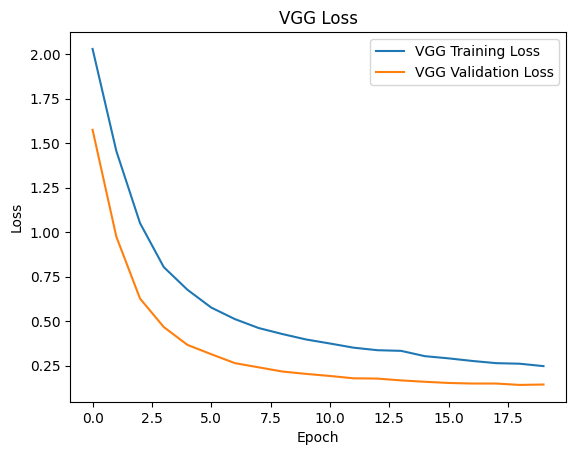

In [9]:
# VGG
plt.plot(vgg_history.history['loss'], label='VGG Training Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Validation Loss')
plt.title('VGG Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

In [10]:
# resnet
resnetTestLoss, resnetTestAccuracy = resnet_model.evaluate(test_images_resized, test_labels)

resnetPredictions = np.argmax(resnet_model.predict(test_images_resized), axis=1)
resnetPrecision = precision_score(test_labels, resnetPredictions, average='weighted')
resnetRecall = recall_score(test_labels, resnetPredictions, average='weighted')

print(f"ResNet Test Accuracy: {resnetTestAccuracy:.3f}")
print(f"ResNet - Precision: {resnetPrecision:.3f}")
print(f"ResNet - Recall   : {resnetRecall:.3f}")

438/438 [==============================] - 90s 203ms/step
ResNet Test Accuracy: 0.908
ResNet - Precision: 0.913
ResNet - Recall   : 0.908



ResNet - Confusion Matrix:


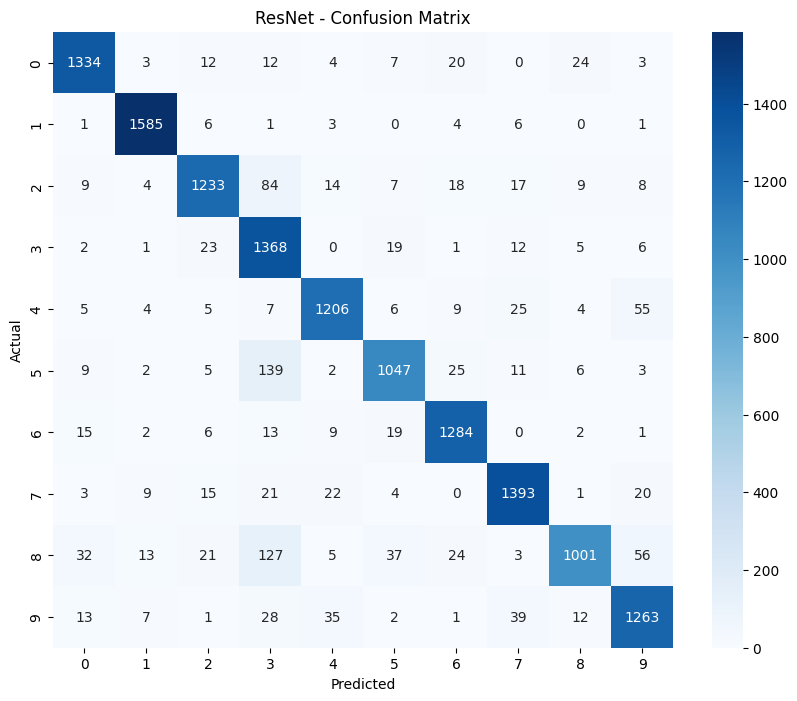

In [11]:
resnetConfMatrix = confusion_matrix(test_labels, resnetPredictions)

print("\nResNet - Confusion Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(resnetConfMatrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ResNet - Confusion Matrix")
plt.show()

In [12]:
# VGG
vggTestLoss, vggTestAccuracy = vgg_model.evaluate(test_images_resized, test_labels)
vggPredictions = np.argmax(vgg_model.predict(test_images_resized), axis=1)
vggPrecision = precision_score(test_labels, vggPredictions, average='weighted')
vggRecall = recall_score(test_labels, vggPredictions, average='weighted')

print(f"\nVGG Test Accuracy: {vggTestAccuracy:.4f}")
print(f"VGG Precision: {vggPrecision:.4f}")
print(f"VGG Recall: {vggRecall:.4f}")

438/438 [==============================] - 207s 472ms/step

VGG Test Accuracy: 0.9534
VGG Precision: 0.9537
VGG Recall: 0.9534



VGG - Confusion Matrix:


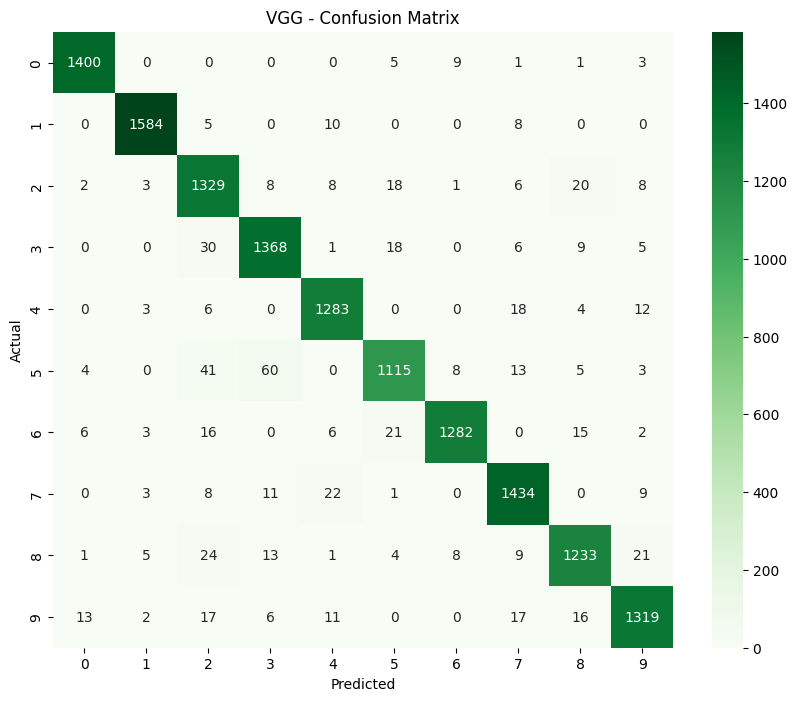

In [13]:
vggConfMatrix = confusion_matrix(test_labels, vggPredictions)

print("\nVGG - Confusion Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(vggConfMatrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VGG - Confusion Matrix")
plt.show()
